Импорт библиотек

In [4]:
# Ваш код
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
import matplotlib.pyplot as plt

Подгрузка датасета

In [10]:
def get_dataset():
    X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)
    return X, y

X, y = get_dataset()

print(X.shape, y.shape)

(1000, 20) (1000,)


In [ ]:
# Ваш код

Выбор базовых моделей

In [11]:
# Ваш код

def get_models():
    models = dict()
    models['LinearRegression'] = LinearRegression()
    models['Ridge'] = Ridge()
    models['Lasso'] = Lasso()
    models['KNeighbors'] = KNeighborsRegressor()
    models['DecisionTree'] = DecisionTreeRegressor()
    models['SVR'] = SVR()
    return models

models = get_models()

Прогнозирование и оценка точности без использования стекинга


In [12]:
# Ваш код

def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# Используем К-фолд кросс валидацию, для обучения и прогноза моделей
results, names = list(), list()
print('Результат:')
print()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %s %.3f' % (name, '- mean_scores:', mean(scores)))

Результат:

>LinearRegression - mean_scores: -0.011
>Ridge - mean_scores: -0.075
>Lasso - mean_scores: -15.740
>KNeighbors - mean_scores: -16254.307
>DecisionTree - mean_scores: -34848.133
>SVR - mean_scores: -41577.303


Прогнозирование с помощью стекинга


In [13]:
# Ваш код

# Результаты базовых моделей подаются в мета-модель
def get_stacking():
    # Базовые модели
    level0 = list()
    level0.append(('LinearRegression', LinearRegression()))
    level0.append(('Ridge', Ridge()))
    level0.append(('Lasso', Lasso()))
    level0.append(('KNeighbors', KNeighborsRegressor()))
    level0.append(('DecisionTree', DecisionTreeRegressor()))
    level0.append(('SVR', SVR()))
    # Мета модель
    level1 = LinearRegression()
    # Определяем ансамбль стекинга
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

# Переопределяем модели, заносим еще модель Стекинга
def get_models():
    models = dict()
    models['LinearRegression'] = LinearRegression()
    models['Ridge'] = Ridge()
    models['Lasso'] = Lasso()
    models['KNeighbors'] = KNeighborsRegressor()
    models['DecisionTree'] = DecisionTreeRegressor()
    models['SVR'] = SVR()
    models['Stacking'] = get_stacking()
    return models

# Используем К-фолд кросс валидацию, для обучения и прогноза моделей
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# Определяем базовые модели
models = get_models()
# Используем К-фолд кросс валидацию, для обучения и прогноза моделей
results, names = list(), list()
for name, model in models.items():
  scores = evaluate_model(model, X, y)
  results.append(scores)
  names.append(name)
  print('>%s %s %.3f %s %.3f' % (name, '- mean_scores:', mean(scores), ',std_scores: ', std(scores)))


>LinearRegression - mean_scores: -0.011 ,std_scores:  0.002
>Ridge - mean_scores: -0.075 ,std_scores:  0.012
>Lasso - mean_scores: -15.740 ,std_scores:  2.624
>KNeighbors - mean_scores: -16254.307 ,std_scores:  2082.544
>DecisionTree - mean_scores: -34702.699 ,std_scores:  4862.619
>SVR - mean_scores: -41577.303 ,std_scores:  6004.216
>Stacking - mean_scores: -0.011 ,std_scores:  0.002


Сравнение результатов

/tmp/ipython-input-1596281760.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=names, showmeans=True)


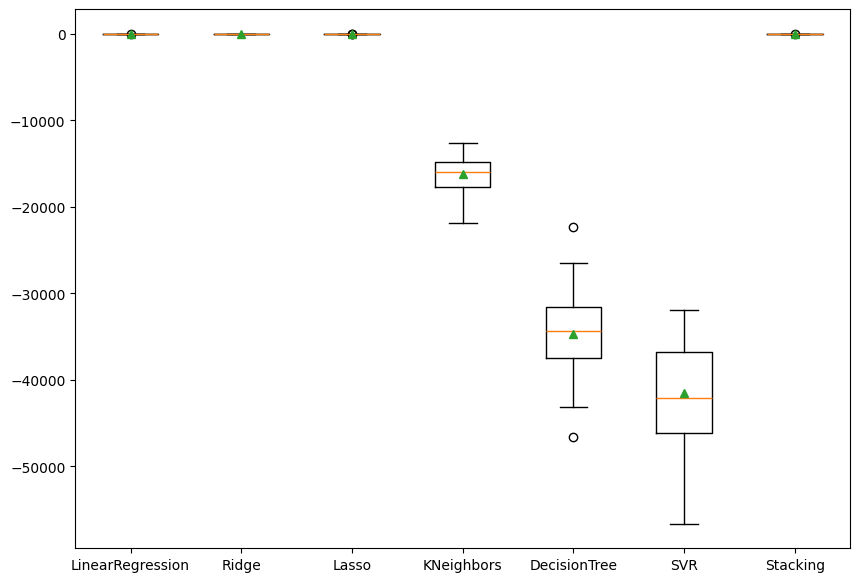

In [14]:
# Ваш код

plt.figure(figsize=(10, 7))

plt.boxplot(results, labels=names, showmeans=True)
plt.show()